# Nicholas Hodge<br> OLA 3

### Problem 1

In [102]:
import pandas
import numpy as np
import tensorflow.keras as keras
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

data = np.array(pandas.read_table(
    "https://www.cs.mtsu.edu/~jphillips/courses/CSCI4850-5850/public/iris-data.txt", 
    delim_whitespace=True,header=None))

X = data[:,0:4]
labels = data[:,4]
Y = keras.utils.to_categorical(labels, len(np.unique(labels)))

input_shape = X.shape[1:]
input_tensor = keras.layers.Input(shape=input_shape,
                                  name="input")
output_shape = Y.shape[1:]
dense_layer = keras.layers.Dense(output_shape[0],
                                activation=keras.activations.sigmoid,
                                name="dense_layer")
output_tensor = dense_layer(input_tensor)

model = keras.Model(input_tensor, output_tensor)

model.compile(loss=keras.losses.mean_squared_error,
              optimizer=keras.optimizers.SGD(learning_rate=0.01),
              metrics=[keras.metrics.categorical_accuracy])

#output_layer_neti = np.dot(np.float32(X[0:5,:]), 
#                           model.get_weights()[0])+model.get_weights()[1]

#1.0 / (1.0+np.exp(-1.0 * output_layer_neti))

weights = model.get_weights()[0]
bias_weights = model.get_weights()[1]

output_neti = np.dot(np.float32(X[0:1]), weights)+bias_weights

output_acts = 1.0 / (1.0 + np.exp(-output_neti))
error = output_acts - np.float32(Y[0:1])

deriv = 2.0 * np.exp(-output_neti) / np.power(1.0+np.exp(-output_neti),2.0)
deltas = error*deriv*(1.0/len(bias_weights))

w_updates = np.outer(np.float32(X[0:1]),deltas)
eta = np.float32(0.01)
history = model.fit(X[0:1],Y[0:1], batch_size=1,epochs=1,verbose=0)

batch_size = 16
epochs = 5000
validation_split = 0.5

history = model.fit(X, Y,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 0,
                    validation_split=validation_split)

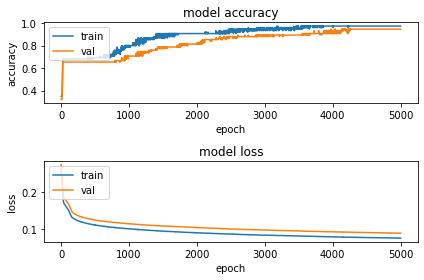

5/5 [==============================] - 0s 1ms/step - loss: 0.0818 - categorical_accuracy: 0.9600
Test loss: 0.08181281387805939
Test accuracy: 0.9599999785423279


In [103]:
plt.figure(1)
#accuracy
plt.subplot(211)
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#loss
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.tight_layout()
plt.show()

score = model.evaluate(X, Y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

### Problem 2

In [104]:
data = np.array(pandas.read_table(
    "https://www.cs.mtsu.edu/~jphillips/courses/CSCI4850-5850/public/WDBC.txt", 
    delim_whitespace=True,header=None))

X = data[:,0:30]
labels = data[:,30]
Y = keras.utils.to_categorical(labels, len(np.unique(labels)))

input_shape = X.shape[1:]
input_tensor = keras.layers.Input(shape=input_shape,
                                  name="input")
output_shape = Y.shape[1:]
dense_layer = keras.layers.Dense(output_shape[0],
                                activation=keras.activations.sigmoid,
                                name="dense_layer")
output_tensor = dense_layer(input_tensor)

model = keras.Model(input_tensor, output_tensor)

model.compile(loss=keras.losses.mean_squared_error,
              optimizer=keras.optimizers.SGD(learning_rate=0.01),
              metrics=[keras.metrics.categorical_accuracy])

weights = model.get_weights()[0]
bias_weights = model.get_weights()[1]

output_neti = np.dot(np.float32(X[0:1]), weights)+bias_weights

output_acts = 1.0 / (1.0 + np.exp(-output_neti))
error = output_acts - np.float32(Y[0:1])

deriv = 2.0 * np.exp(-output_neti) / np.power(1.0+np.exp(-output_neti),2.0)
deltas = error*deriv*(1.0/len(bias_weights))

w_updates = np.outer(np.float32(X[0:1]),deltas)
eta = np.float32(0.01)
history = model.fit(X[0:1],Y[0:1], batch_size=1,epochs=1,verbose=0)

batch_size = 16
epochs = 3000
validation_split = 0.5

history = model.fit(X, Y,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 0,
                    validation_split=validation_split)

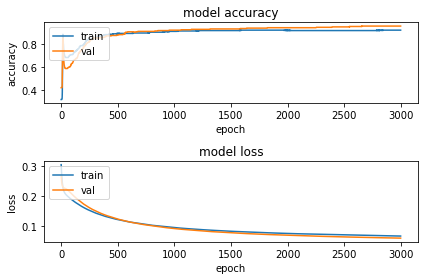

18/18 [==============================] - 0s 1ms/step - loss: 0.0641 - categorical_accuracy: 0.9366
Test loss: 0.06409724056720734
Test accuracy: 0.9366196990013123


In [105]:
plt.figure(1)
#accuracy
plt.subplot(211)
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#loss
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.tight_layout()
plt.show()

score = model.evaluate(X, Y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])